# Mid-infrared (MIR, FT-IR) spectroscopy dataset technical validation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sklearn.cluster import KMeans
import os

plt.style.use("seaborn-v0_8")

In [3]:
tma_num = 2

## Loading some data

In [4]:
# Get the list of all files for one TMA
path = f"/home/borbende/multimodal_CRC_dataset/TMA{tma_num}/MIR/spectra"
dir_list = os.listdir(path)
# prints all files
dir_list = sorted([f for f in dir_list if os.path.isfile(path+'/'+f)])
print(*dir_list, sep="\n")

tma2_B1_res8_co16_2.2int_25.txt
tma2_B2_res8_co16_2.2int_25.txt
tma2_B3_res8_co16_2.2int_25.txt
tma2_B6_res8_co16_2.2int_25.txt
tma2_C1_res8_co16_2.2int_25.txt
tma2_C2_res8_co16_2.2int_25.txt
tma2_C3_res8_co16_2.2int_25.txt
tma2_C5_res8_co16_2.2int_25.txt
tma2_C6_res8_co16_2.2int_25.txt
tma2_D1_res8_co16_2.2int_25.txt
tma2_D3_res8_co16_2.2int_25.txt
tma2_D5_res8_co16_2.2int_25.txt
tma2_D6_res8_co16_2.2int_25.txt
tma2_E1_res8_co16_2.2int_25.txt
tma2_E2_res8_co16_2.2int_25.txt
tma2_E3_res8_co16_2.2int_25.txt
tma2_E4_res8_co16_2.2int_25.txt
tma2_E6_res8_co16_2.2int_25.txt
tma2_F1_res8_co16_2.2int_25.txt
tma2_F2_res8_co16_2.2int_25.txt
tma2_F3_res8_co16_2.2int_25.txt
tma2_F4_res8_co16_2.2int_25.txt
tma2_F5_res8_co16_2.2int_25.txt
tma2_F6_res8_co16_2.2int_25.txt
tma2_G1_res8_co16_2.2int_25.txt
tma2_G2_res8_co16_2.2int_25.txt
tma2_G3_res8_co16_2.2int_25.txt
tma2_G4_res8_co16_2.2int_25.txt
tma2_G5_res8_co16_2.2int_25.txt
tma2_G6_res8_co16_2.2int_25.txt
tma2_H1_res8_co16_2.2int_25.txt
tma2_H2_

In [5]:
# Loading metadata to pair labels with spectra

spectra_labels = pd.read_csv(f"/home/borbende/multimodal_CRC_dataset/TMA{tma_num}/TMA{tma_num}_core_metadata.csv")
spectra_labels.head(5)

,cores,cancer,patient,has_MIR,on_WSI
0,B1,NC,7183_09,yes,yes
1,B2,CRC,7183_09,yes,yes
2,B3,CRLM,4115_10,yes,yes
3,B4,NC,7531/09,no,yes
4,B5,CRC,7531/09,no,yes


In [6]:
labels = []
colon = []
for i in dir_list:
    lab = i[5:7]    # Core id: "B1"
    labels.append(lab)
    idx = spectra_labels.index[spectra_labels['cores'] == lab][0]
    colon.append(spectra_labels.loc[idx, 'cancer']) # cancer. "NC" or "CRC" or "CRLM"

In [7]:
%%time

# All MIR spectra of one TMA combined into one table complete with labels

dfs = []
for i in range(len(dir_list)):
    frame = pd.read_csv(f'{path}/{dir_list[i]}', index_col = 0)
    frame['labels'] = labels[i]
    frame['colon'] = colon[i]
    dfs.append(frame)
    
df = pd.concat(dfs, axis=0, ignore_index=True)
print(df.shape)
df.head(10)

(317504, 818)
CPU times: user 11.9 s, sys: 677 ms, total: 12.6 s
Wall time: 12.6 s


,X,Y,4000.0,3996.0,3992.0,3988.0,3984.0,3980.0,3976.0,3972.0,...,776.0,772.0,768.0,764.0,760.0,756.0,752.0,748.0,labels,colon
0,-1087.499957,1087.499957,93.487900,93.563950,93.505070,93.461070,93.532776,93.524130,93.386330,93.269880,...,95.409550,95.332400,95.205270,95.062890,95.053345,95.202390,95.307304,95.279770,B1,NC
1,-1062.499958,1087.499957,93.430860,93.379150,93.302990,93.249050,93.258224,93.244520,93.041374,92.844550,...,95.157220,95.129680,95.121300,95.142400,95.206810,95.280640,95.290960,95.244095,B1,NC
2,-1037.499959,1087.499957,93.190450,93.241300,93.465744,93.715540,93.827225,93.775100,93.540350,93.306435,...,95.228850,95.188720,95.174480,95.153465,95.103120,95.016050,94.899700,94.929405,B1,NC
3,-1012.499960,1087.499957,93.760290,93.864070,93.858720,93.766310,93.692240,93.586210,93.468610,93.467670,...,94.924324,94.980850,95.197400,95.343475,95.357994,95.383354,95.409680,95.328400,B1,NC
4,-987.499961,1087.499957,93.933586,93.934690,93.890420,93.796070,93.764860,93.797210,93.908300,93.981050,...,95.228700,95.211800,95.149864,95.084070,95.023460,95.126840,95.273560,95.237785,B1,NC
5,-962.499962,1087.499957,93.926900,93.830110,93.670560,93.467910,93.488810,93.720760,93.775720,93.690636,...,95.115105,95.155300,95.191376,95.204720,95.114200,94.983050,95.013210,95.139854,B1,NC
6,-937.499963,1087.499957,94.071120,94.071175,93.841260,93.672490,93.836960,94.003330,93.966286,93.819244,...,95.112640,95.244650,95.314735,95.250780,95.164700,95.121900,95.183230,95.305440,B1,NC
7,-912.499964,1087.499957,94.071590,93.889990,93.679184,93.733826,93.936264,94.091965,94.195120,94.081955,...,95.133660,95.090706,95.005410,94.957630,94.975830,95.004830,94.949350,94.881160,B1,NC
8,-887.499965,1087.499957,94.329160,94.273720,94.053750,93.879295,93.942360,94.013800,93.897880,93.796420,...,95.074700,95.070760,95.129410,95.114050,95.117750,95.193330,95.239280,95.249435,B1,NC
9,-862.499966,1087.499957,93.742880,93.802300,93.702065,93.608290,93.658770,93.896460,94.012340,93.820625,...,94.796810,94.929985,95.045044,95.022780,95.004090,95.063446,94.997390,94.761950,B1,NC


In [8]:
df.isna().sum().sum()

0

## Conversion from transmittance % to absorbance

In [9]:
def tr2ab(data):     #From transmittance % to absorbance.
    return -np.log10(data / 100)

df.iloc[:, 2:-2] = tr2ab(df.iloc[:, 2:-2])
df

,X,Y,4000.0,3996.0,3992.0,3988.0,3984.0,3980.0,3976.0,3972.0,...,776.0,772.0,768.0,764.0,760.0,756.0,752.0,748.0,labels,colon
0,-1087.499957,1087.499957,0.029245,0.028891,0.029165,0.029369,0.029036,0.029076,0.029717,0.030259,...,0.020408,0.020759,0.021339,0.021989,0.022033,0.021352,0.020874,0.020999,B1,NC
1,-1062.499958,1087.499957,0.029510,0.029750,0.030104,0.030356,0.030313,0.030377,0.031324,0.032244,...,0.021558,0.021684,0.021722,0.021626,0.021332,0.020995,0.020948,0.021162,B1,NC
2,-1037.499959,1087.499957,0.030629,0.030392,0.029348,0.028188,0.027671,0.027912,0.029001,0.030088,...,0.021231,0.021415,0.021479,0.021575,0.021805,0.022203,0.022735,0.022599,B1,NC
3,-1012.499960,1087.499957,0.027981,0.027501,0.027525,0.027953,0.028296,0.028788,0.029334,0.029339,...,0.022622,0.022364,0.021375,0.020709,0.020643,0.020527,0.020408,0.020778,B1,NC
4,-987.499961,1087.499957,0.027179,0.027174,0.027379,0.027815,0.027960,0.027810,0.027296,0.026960,...,0.021232,0.021309,0.021592,0.021892,0.022169,0.021697,0.021028,0.021191,B1,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317499,987.499961,-1087.499957,0.018709,0.019551,0.020437,0.020721,0.020187,0.019729,0.020734,0.022030,...,0.022507,0.023060,0.023014,0.022376,0.022207,0.022616,0.023093,0.023470,I5,CRC
317500,1012.499960,-1087.499957,0.019720,0.019139,0.019482,0.019969,0.019994,0.020063,0.020522,0.020995,...,0.019281,0.019970,0.020056,0.019709,0.019223,0.019086,0.019588,0.020385,I5,CRC
317501,1037.499959,-1087.499957,0.019383,0.019243,0.020078,0.020239,0.020167,0.020722,0.021609,0.022305,...,0.017590,0.018193,0.018433,0.018034,0.017139,0.016570,0.016506,0.016789,I5,CRC
317502,1062.499958,-1087.499957,0.022630,0.022401,0.023315,0.024290,0.024398,0.024275,0.024428,0.024585,...,0.016729,0.016712,0.016654,0.016703,0.016624,0.016448,0.016479,0.016557,I5,CRC


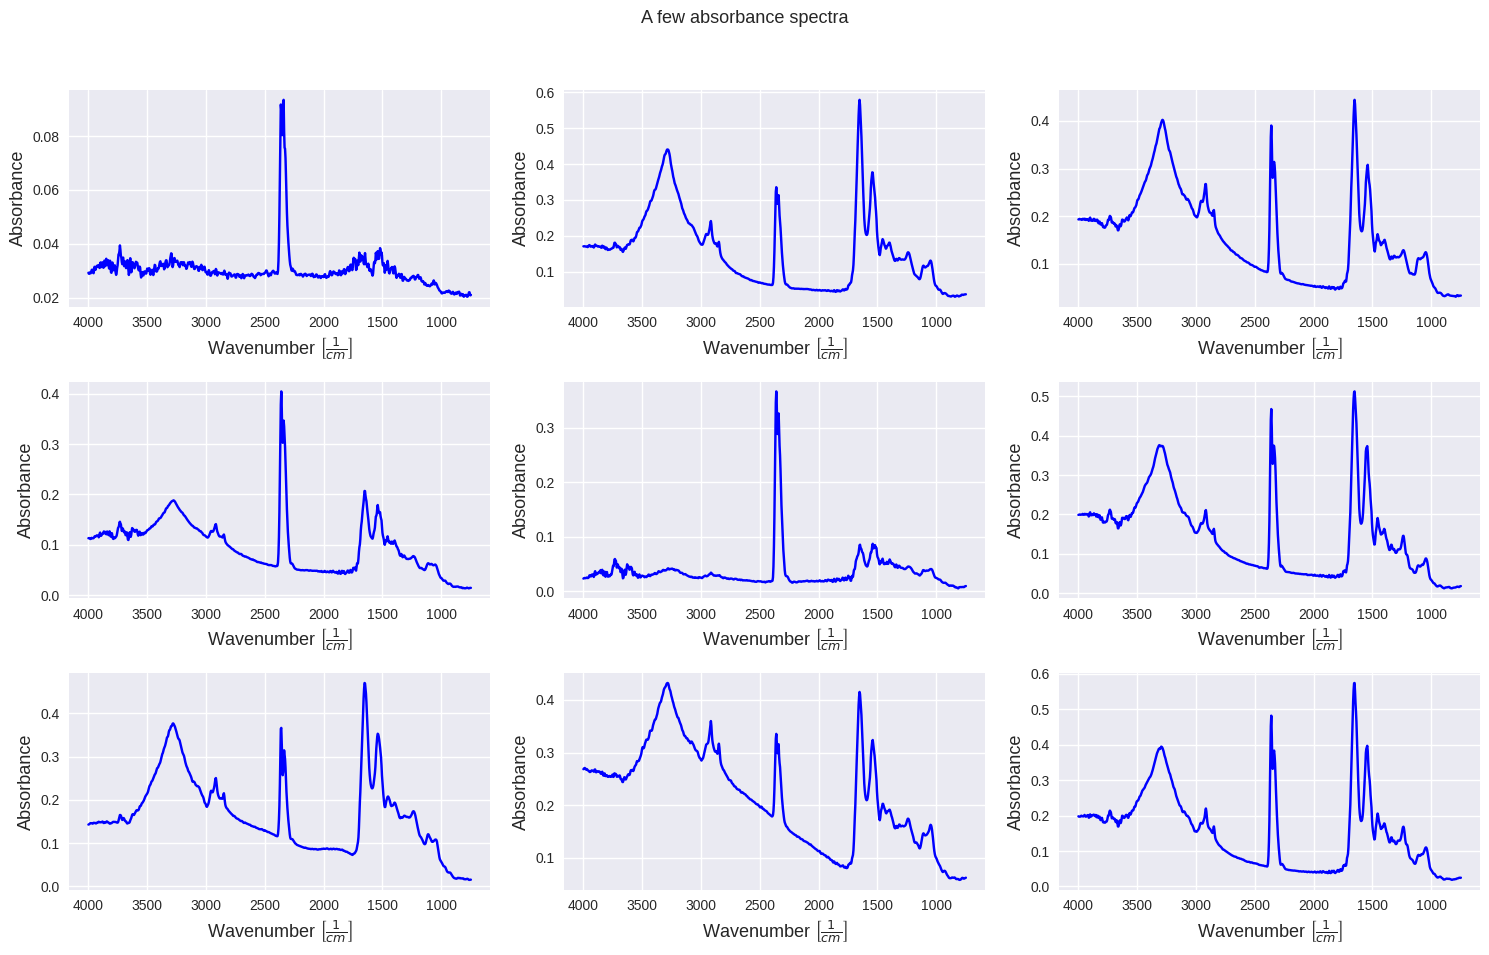

In [10]:
plt.figure(figsize = (15, 10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.plot(df.columns.values[2:-2].astype(np.float64), df.iloc[i * 10000,2:-2], color = "b")
    plt.xlabel(r"Wavenumber $\left[\frac{1}{cm}\right]$", fontsize = 13)
    plt.ylabel("Absorbance", fontsize = 13)
    plt.gca().invert_xaxis()
    
plt.suptitle("A few absorbance spectra", fontsize = 13)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Slide background filtering

In [11]:
df2 = df.copy()
df2

,X,Y,4000.0,3996.0,3992.0,3988.0,3984.0,3980.0,3976.0,3972.0,...,776.0,772.0,768.0,764.0,760.0,756.0,752.0,748.0,labels,colon
0,-1087.499957,1087.499957,0.029245,0.028891,0.029165,0.029369,0.029036,0.029076,0.029717,0.030259,...,0.020408,0.020759,0.021339,0.021989,0.022033,0.021352,0.020874,0.020999,B1,NC
1,-1062.499958,1087.499957,0.029510,0.029750,0.030104,0.030356,0.030313,0.030377,0.031324,0.032244,...,0.021558,0.021684,0.021722,0.021626,0.021332,0.020995,0.020948,0.021162,B1,NC
2,-1037.499959,1087.499957,0.030629,0.030392,0.029348,0.028188,0.027671,0.027912,0.029001,0.030088,...,0.021231,0.021415,0.021479,0.021575,0.021805,0.022203,0.022735,0.022599,B1,NC
3,-1012.499960,1087.499957,0.027981,0.027501,0.027525,0.027953,0.028296,0.028788,0.029334,0.029339,...,0.022622,0.022364,0.021375,0.020709,0.020643,0.020527,0.020408,0.020778,B1,NC
4,-987.499961,1087.499957,0.027179,0.027174,0.027379,0.027815,0.027960,0.027810,0.027296,0.026960,...,0.021232,0.021309,0.021592,0.021892,0.022169,0.021697,0.021028,0.021191,B1,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317499,987.499961,-1087.499957,0.018709,0.019551,0.020437,0.020721,0.020187,0.019729,0.020734,0.022030,...,0.022507,0.023060,0.023014,0.022376,0.022207,0.022616,0.023093,0.023470,I5,CRC
317500,1012.499960,-1087.499957,0.019720,0.019139,0.019482,0.019969,0.019994,0.020063,0.020522,0.020995,...,0.019281,0.019970,0.020056,0.019709,0.019223,0.019086,0.019588,0.020385,I5,CRC
317501,1037.499959,-1087.499957,0.019383,0.019243,0.020078,0.020239,0.020167,0.020722,0.021609,0.022305,...,0.017590,0.018193,0.018433,0.018034,0.017139,0.016570,0.016506,0.016789,I5,CRC
317502,1062.499958,-1087.499957,0.022630,0.022401,0.023315,0.024290,0.024398,0.024275,0.024428,0.024585,...,0.016729,0.016712,0.016654,0.016703,0.016624,0.016448,0.016479,0.016557,I5,CRC


In [12]:
specnum = int(len(df2) / len(labels))  # Number of spectra within a singular measurement (one tissue core)
print(specnum)
print(labels)
print(len(labels))  # Number of measurements (tissue cores) within the TMA that had MIR data

7744
['B1', 'B2', 'B3', 'B6', 'C1', 'C2', 'C3', 'C5', 'C6', 'D1', 'D3', 'D5', 'D6', 'E1', 'E2', 'E3', 'E4', 'E6', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'I1', 'I2', 'I3', 'I4', 'I5']
41


In [13]:
%%time

df2["avg"] = df2.iloc[:,2:-2].mean(axis = 1)   # Average absorbance to help Kmeans clustering labels be consistent
df2["kmeans"] = 0                              # A column to store the clustering labels for filtering

for i in range(len(labels)):
    kmeans = KMeans(n_clusters = 2, n_init='auto')            # The 2 clusters are: 0: tissue, 1: background
    trafo = kmeans.fit_transform(df2.iloc[i*specnum:(i+1)*specnum,2:-4])    # Applying the clustering per core
    # Need to fix the labels as 0: tissue, 1: background, by finding the index of the  maximum average absorbance in a core (this is tissue)
    ind = df2[i*specnum:(i+1)*specnum][df2[i*specnum:(i+1)*specnum]["avg"] == max(df2[i*specnum:(i+1)*specnum]["avg"])].index[0]
    ind2 = ind - (i * specnum)   # local indices of a core
    if kmeans.labels_[ind2] == 0: # if the value at that index is 0 (tissue class), keep this labelling
        df2.iloc[i*specnum:(i+1)*specnum,-1] = kmeans.labels_
    else: # if the value at that index is 1, reverse the labelling
        df2.iloc[i*specnum:(i+1)*specnum,-1] = 1 - kmeans.labels_

CPU times: user 7.67 s, sys: 764 ms, total: 8.43 s
Wall time: 3.38 s


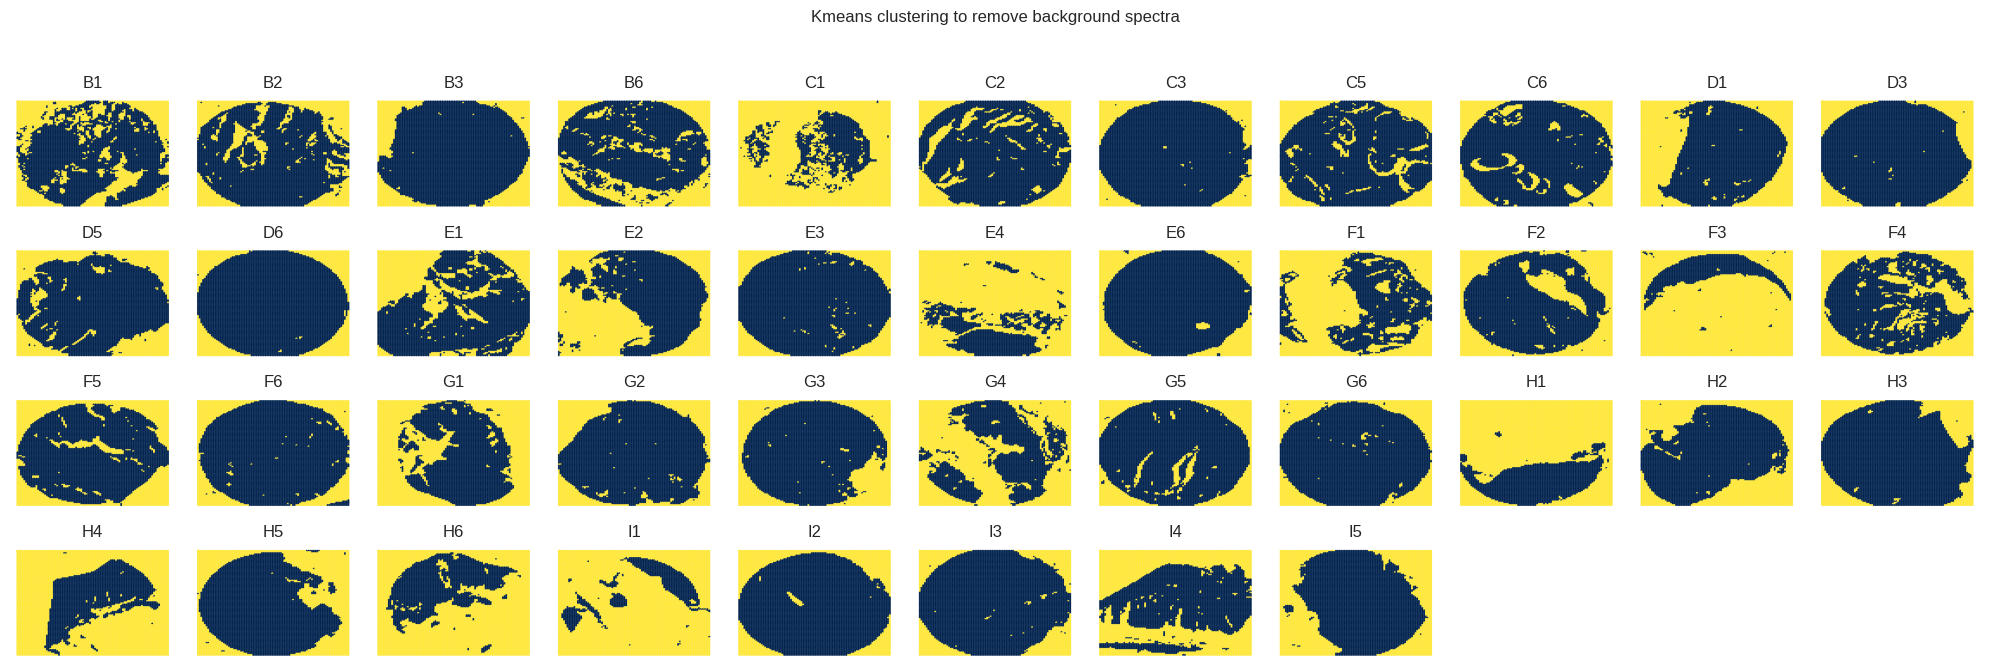

In [14]:
plt.figure(figsize = (20, 7))

for i in range(len(labels)):
    plt.subplot(4, 11, i + 1)
    plt.scatter(df2.loc[i*specnum:(i+1)*specnum,"X"], df2.loc[i*specnum:(i+1)*specnum,"Y"], 
                c = df2.loc[i*specnum:(i+1)*specnum, "kmeans"], marker = ".", s = 5, alpha = 1.0, cmap = 'cividis')
    plt.title(df2.loc[i*specnum:(i+1)*specnum,'labels'].iloc[0])
    plt.axis('off')

plt.suptitle("Kmeans clustering to remove background spectra")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [15]:
bg_df = df2[df2["kmeans"] == 1]
bg_df = bg_df.drop(['avg', 'kmeans'], axis = 1)
bg_df # retaining background spectra

,X,Y,4000.0,3996.0,3992.0,3988.0,3984.0,3980.0,3976.0,3972.0,...,776.0,772.0,768.0,764.0,760.0,756.0,752.0,748.0,labels,colon
0,-1087.499957,1087.499957,0.029245,0.028891,0.029165,0.029369,0.029036,0.029076,0.029717,0.030259,...,0.020408,0.020759,0.021339,0.021989,0.022033,0.021352,0.020874,0.020999,B1,NC
1,-1062.499958,1087.499957,0.029510,0.029750,0.030104,0.030356,0.030313,0.030377,0.031324,0.032244,...,0.021558,0.021684,0.021722,0.021626,0.021332,0.020995,0.020948,0.021162,B1,NC
2,-1037.499959,1087.499957,0.030629,0.030392,0.029348,0.028188,0.027671,0.027912,0.029001,0.030088,...,0.021231,0.021415,0.021479,0.021575,0.021805,0.022203,0.022735,0.022599,B1,NC
3,-1012.499960,1087.499957,0.027981,0.027501,0.027525,0.027953,0.028296,0.028788,0.029334,0.029339,...,0.022622,0.022364,0.021375,0.020709,0.020643,0.020527,0.020408,0.020778,B1,NC
4,-987.499961,1087.499957,0.027179,0.027174,0.027379,0.027815,0.027960,0.027810,0.027296,0.026960,...,0.021232,0.021309,0.021592,0.021892,0.022169,0.021697,0.021028,0.021191,B1,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317499,987.499961,-1087.499957,0.018709,0.019551,0.020437,0.020721,0.020187,0.019729,0.020734,0.022030,...,0.022507,0.023060,0.023014,0.022376,0.022207,0.022616,0.023093,0.023470,I5,CRC
317500,1012.499960,-1087.499957,0.019720,0.019139,0.019482,0.019969,0.019994,0.020063,0.020522,0.020995,...,0.019281,0.019970,0.020056,0.019709,0.019223,0.019086,0.019588,0.020385,I5,CRC
317501,1037.499959,-1087.499957,0.019383,0.019243,0.020078,0.020239,0.020167,0.020722,0.021609,0.022305,...,0.017590,0.018193,0.018433,0.018034,0.017139,0.016570,0.016506,0.016789,I5,CRC
317502,1062.499958,-1087.499957,0.022630,0.022401,0.023315,0.024290,0.024398,0.024275,0.024428,0.024585,...,0.016729,0.016712,0.016654,0.016703,0.016624,0.016448,0.016479,0.016557,I5,CRC


In [16]:
df2 = df2[df2["kmeans"] == 0]
df2 = df2.drop(['avg', 'kmeans'], axis = 1)
df2  # tissue spectra

,X,Y,4000.0,3996.0,3992.0,3988.0,3984.0,3980.0,3976.0,3972.0,...,776.0,772.0,768.0,764.0,760.0,756.0,752.0,748.0,labels,colon
40,-87.499997,1087.499957,0.278201,0.277688,0.276452,0.275870,0.276810,0.278268,0.278335,0.277757,...,0.056301,0.056358,0.056474,0.057027,0.057593,0.057739,0.058140,0.058512,B1,NC
41,-62.499998,1087.499957,0.302912,0.303015,0.302805,0.303294,0.302921,0.301677,0.300496,0.299916,...,0.065933,0.066195,0.066932,0.067454,0.068119,0.068363,0.068200,0.068535,B1,NC
42,-37.499999,1087.499957,0.304354,0.305152,0.305220,0.304960,0.304864,0.304398,0.304033,0.304471,...,0.073756,0.073511,0.073596,0.074023,0.073940,0.073843,0.074084,0.074001,B1,NC
43,-12.500000,1087.499957,0.304907,0.305162,0.306462,0.307090,0.305592,0.304080,0.304731,0.305679,...,0.058335,0.058209,0.058072,0.058802,0.059940,0.060230,0.059837,0.059623,B1,NC
44,12.500000,1087.499957,0.298919,0.297947,0.299711,0.300601,0.300518,0.300938,0.300174,0.297789,...,0.073839,0.073920,0.074263,0.074839,0.075854,0.077193,0.078441,0.078500,B1,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317467,187.499993,-1087.499957,0.251668,0.251190,0.250832,0.249883,0.249944,0.249935,0.249613,0.249665,...,0.044705,0.044152,0.043796,0.043815,0.043758,0.043742,0.043899,0.043518,I5,CRC
317468,212.499992,-1087.499957,0.272579,0.274155,0.275157,0.273661,0.271072,0.270391,0.272580,0.274925,...,0.040727,0.040600,0.039965,0.039160,0.038938,0.038899,0.038975,0.038850,I5,CRC
317469,237.499991,-1087.499957,0.281873,0.281498,0.281233,0.280917,0.280522,0.280564,0.281005,0.280762,...,0.038551,0.038390,0.037800,0.037027,0.036442,0.036260,0.036461,0.036365,I5,CRC
317470,262.499990,-1087.499957,0.264210,0.263653,0.262682,0.261010,0.260551,0.261491,0.262384,0.262273,...,0.036673,0.036433,0.036272,0.035943,0.035823,0.035774,0.035506,0.035420,I5,CRC


## Signal-to-Noise ratio

In [17]:
def empirical_SNR(df):
    sp_cols = [col for col in df.columns if col not in ["X", "Y", "labels", "colon"]]
    sp_values = np.array(sp_cols, dtype=float)
    
    # Compute mean and std across all spectra
    mean_spectrum = df[sp_cols].mean(axis=0)
    print(sp_cols[np.where(mean_spectrum == mean_spectrum.max())[0][0]])
    std_spectrum = df[sp_cols].std(axis=0)
    
    
    plt.figure(figsize=(12, 4))
    plt.plot(sp_values, mean_spectrum.values, label="Mean spectrum")
    plt.title("Mean FT-IR spectrum")
    plt.xlabel(r"Wavenumbers $\left[\frac{1}{cm}\right]$")
    plt.ylabel("Absorbance")
    plt.gca().invert_xaxis()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 4))
    plt.plot(sp_values, std_spectrum.values, color="orange", label="Std. deviation")
    plt.title("Standard deviation per wavenumber")
    plt.xlabel(r"Wavenumbers $\left[\frac{1}{cm}\right]$")
    plt.ylabel("Std. dev. of absorbance")
    plt.gca().invert_xaxis()
    plt.tight_layout()
    plt.show()

1652.0


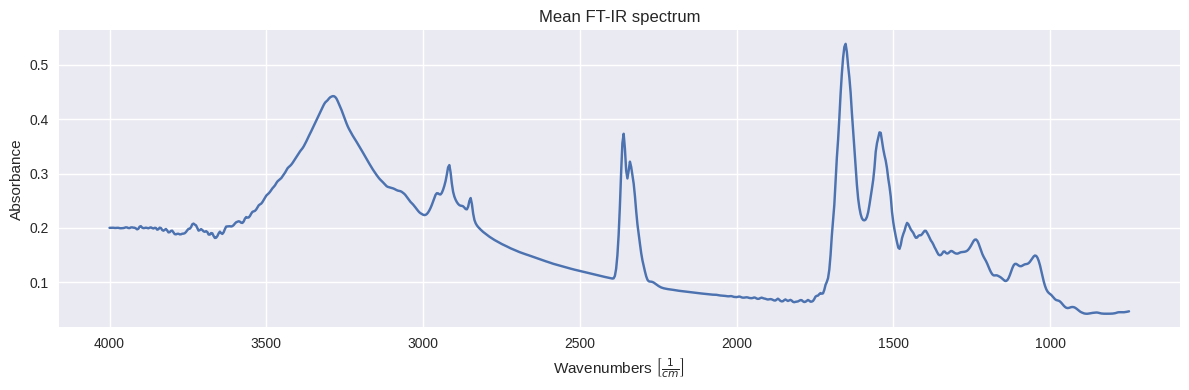

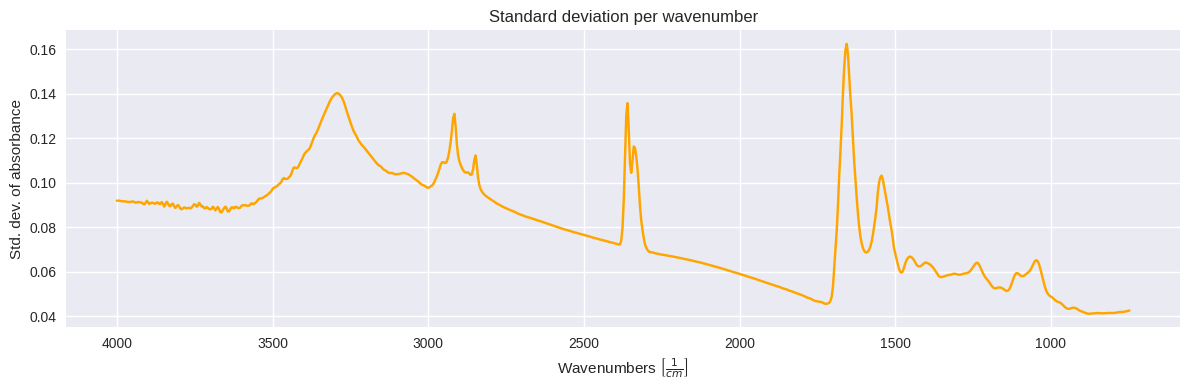

In [18]:
empirical_SNR(df2)

2360.0


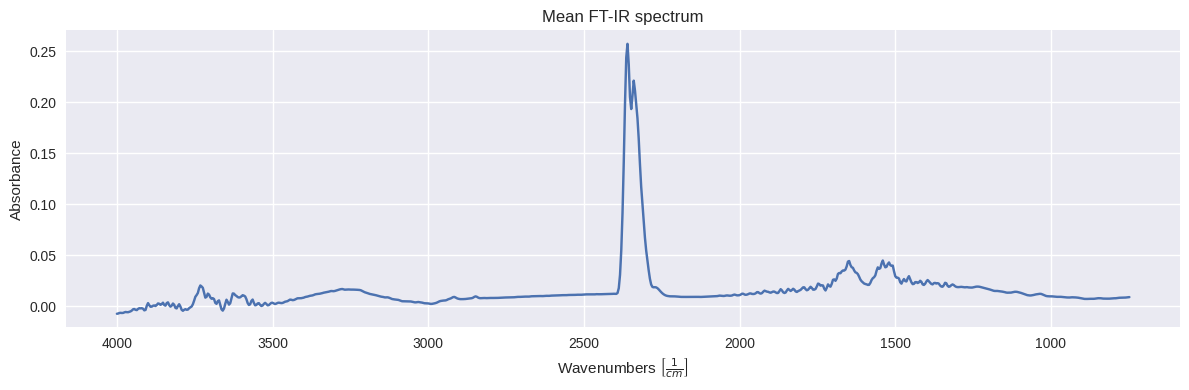

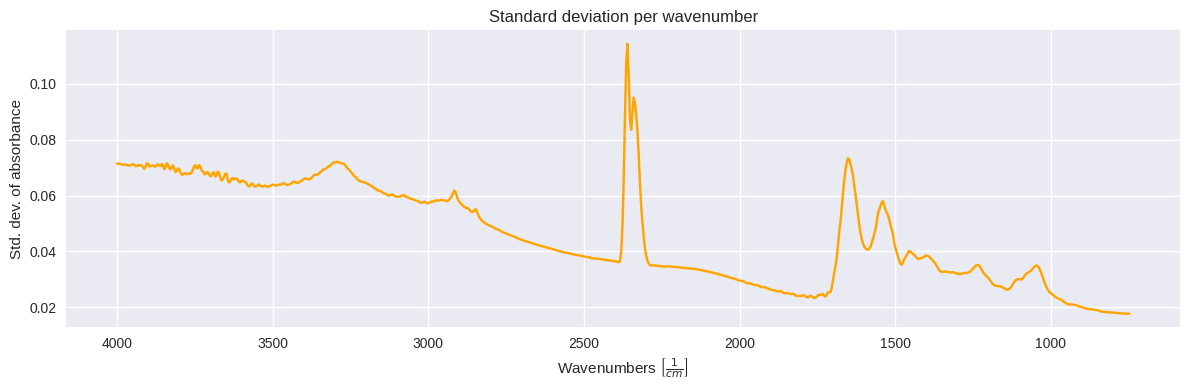

In [19]:
empirical_SNR(bg_df)

In [20]:
def SNR_plot(snr_data):
    plt.figure(figsize = (10, 6))
    
    bad_SNR = 3
    great_SNR = 100
    
    sns.histplot(snr_data, bins = 100, color = 'moccasin')
    max_y = max(p.get_height() for p in plt.gca().patches)   # Get the maximal Y value of the histogram plot for automation purposes
    max_y = max_y * 1.05                                     # Leaving some room
    plt.axvline(bad_SNR, color="red", linestyle="--")
    print(f'Number of spectra with SNR < {bad_SNR}:', (snr_data < bad_SNR).sum())
    plt.axvline(great_SNR, color="red", linestyle="--")
    print(f'Number of spectra with {bad_SNR} < SNR < {great_SNR}:', ((snr_data < great_SNR) & (snr_data > bad_SNR)).sum())
    print(f'Number of spectra with SNR >= {great_SNR}:', (snr_data >= great_SNR).sum())
    plt.ylim(0, max_y)
    plt.xlabel('Signal-to-noise ratio')
    plt.ylabel('Counts')
    plt.show()

#### Signal is a peak

https://epjtechniquesandinstrumentation.springeropen.com/articles/10.1140/epjti/s40485-015-0018-6

"Both upper and lower thresholds can be applied on FTIR absorbance values of a specific vibration mode, for example the amide I region, which generally indicates inconsistent sample thickness regions [46, 51]. For example, a low sample thickness is indicated by the presence of noise in the case of FTIR imaging data. Pixels (FTIR spectra) corresponding to these regions ought to be removed before proceeding with further steps. A threshold on the absorbance of amide I band can identify these regions quite effectively [44]. Similarly, a threshold on the area under such bands may also be applied to eliminate unwanted spectra."

"Alternatively, SNR thresholding can also be applied to detect outliers. For example, in case of biological samples, the absorbance value of amide I (1620–1690 cm−1) can be considered as signal and the absorbance values in the dead region or signal free zone (1800–1900 cm−1) can be considered as noise (background) [46, 51]. A threshold can be applied on the SNR calculated as explained above and will remove unwanted spectra quite effectively."

https://pubs.acs.org/doi/abs/10.1021/ed079p1358

In [21]:
def SNR(data):
    wavenumbers = data.columns.values.astype(np.float64)   # wavenumbers
    flat_region = (wavenumbers > 2000) & (wavenumbers < 2100)
    #signal = data.max(axis=1) - data.min(axis=1)
    signal_peak = 1652.0
    signal = data[f"{signal_peak}"]
    noise_std = data.iloc[:, flat_region].std(axis=1)
    snr = signal / noise_std
    return snr

In [22]:
tma_snr = SNR(df2.iloc[:,2:-2])
bg_snr = SNR(bg_df.iloc[:,2:-2])

Number of spectra with SNR < 3: 0
Number of spectra with 3 < SNR < 100: 11295
Number of spectra with SNR >= 100: 180322


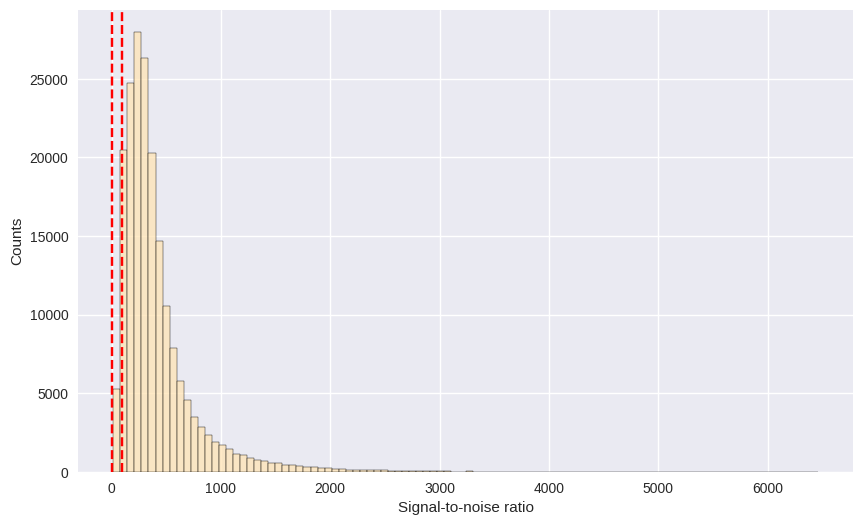

In [23]:
SNR_plot(tma_snr)

Number of spectra with SNR < 3: 22715
Number of spectra with 3 < SNR < 100: 76400
Number of spectra with SNR >= 100: 26772


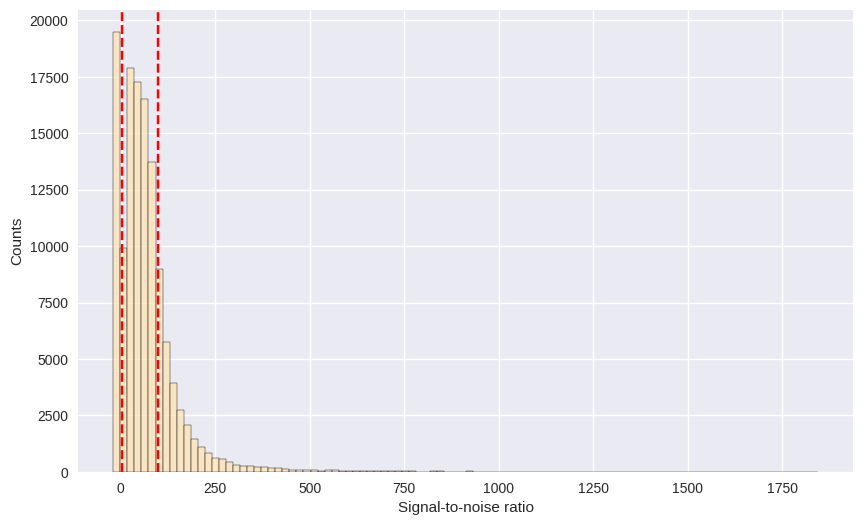

In [24]:
SNR_plot(bg_snr)

Tissue spectra:
   Number of spectra with SNR < 3: 0
   Number of spectra with 3 < SNR < 100: 11295
   Number of spectra with SNR >= 100: 180322
Background spectra:
   Number of spectra with SNR < 3: 22715
   Number of spectra with 3 < SNR < 100: 76400
   Number of spectra with SNR >= 100: 26772


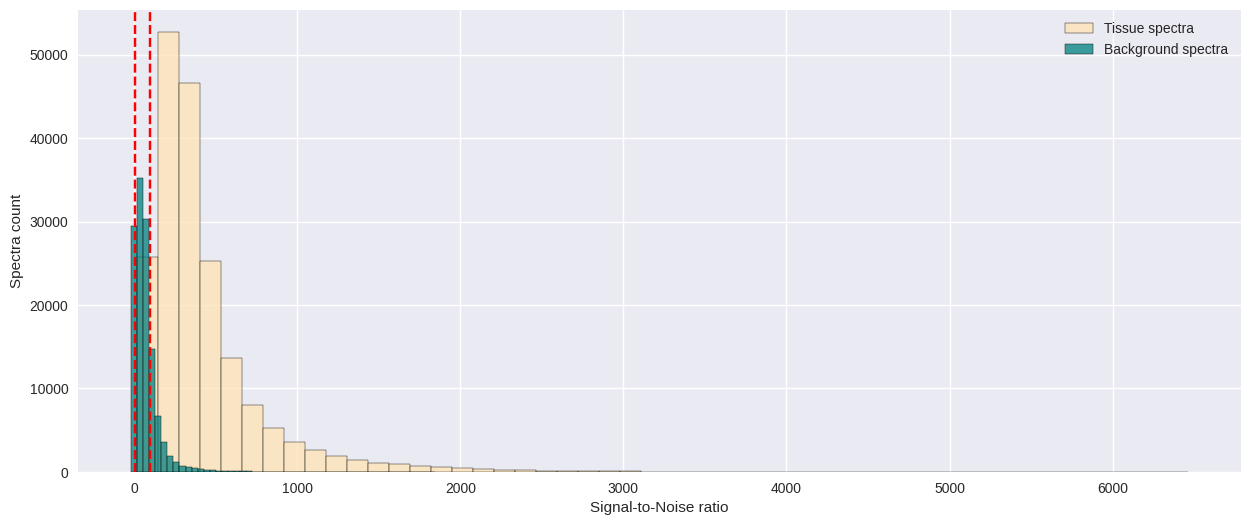

In [25]:
bad_SNR = 3
great_SNR = 100

plt.figure(figsize = (15, 6))
sns.histplot(tma_snr, bins=50, color="moccasin", label = "Tissue spectra")
sns.histplot(bg_snr, bins=50, color="teal", label = "Background spectra")
plt.axvline(bad_SNR, color="red", linestyle="--")
plt.axvline(great_SNR, color="red", linestyle="--")
print("Tissue spectra:")
print(f'   Number of spectra with SNR < {bad_SNR}:', (tma_snr < bad_SNR).sum())
print(f'   Number of spectra with {bad_SNR} < SNR < {great_SNR}:', ((tma_snr < great_SNR) & (tma_snr > bad_SNR)).sum())
print(f'   Number of spectra with SNR >= {great_SNR}:', (tma_snr >= great_SNR).sum())

print("Background spectra:")
print(f'   Number of spectra with SNR < {bad_SNR}:', (bg_snr < bad_SNR).sum())
print(f'   Number of spectra with {bad_SNR} < SNR < {great_SNR}:', ((bg_snr < great_SNR) & (bg_snr > bad_SNR)).sum())
print(f'   Number of spectra with SNR >= {great_SNR}:', (bg_snr >= great_SNR).sum())
plt.xlabel("Signal-to-Noise ratio")
plt.ylabel("Spectra count")
plt.legend()
plt.show()

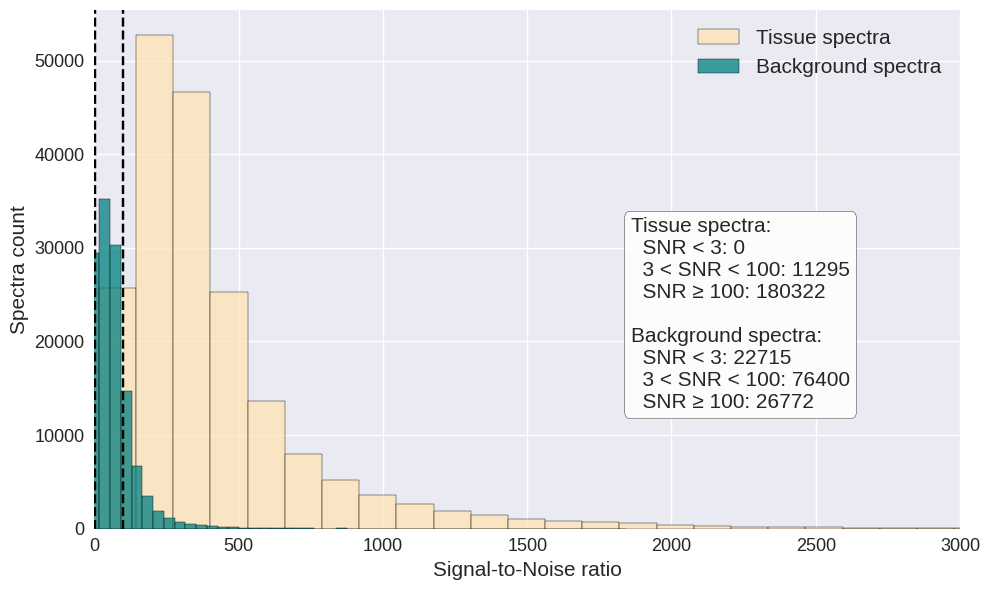

In [26]:
bad_SNR = 3
great_SNR = 100

plt.figure(figsize=(10, 6))

# Histogram overlays
sns.histplot(tma_snr, bins=50, color="moccasin", label="Tissue spectra")
sns.histplot(bg_snr, bins=50, color="teal", label="Background spectra")

# Vertical cutoff lines
plt.axvline(bad_SNR, color="black", linestyle="--")
plt.axvline(great_SNR, color="black", linestyle="--")

# Stats text
tissue_text = (
    "Tissue spectra:\n"
    f"  SNR < {bad_SNR}: {(tma_snr < bad_SNR).sum()}\n"
    f"  {bad_SNR} < SNR < {great_SNR}: {((tma_snr < great_SNR) & (tma_snr > bad_SNR)).sum()}\n"
    f"  SNR ≥ {great_SNR}: {(tma_snr >= great_SNR).sum()}"
)

background_text = (
    "Background spectra:\n"
    f"  SNR < {bad_SNR}: {(bg_snr < bad_SNR).sum()}\n"
    f"  {bad_SNR} < SNR < {great_SNR}: {((bg_snr < great_SNR) & (bg_snr > bad_SNR)).sum()}\n"
    f"  SNR ≥ {great_SNR}: {(bg_snr >= great_SNR).sum()}"
)

# Place text box inside plot
plt.text(
    0.62, 0.60,
    tissue_text + "\n\n" + background_text,
    transform=plt.gca().transAxes,
    fontsize=15,
    va="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.9)
)

plt.xlabel("Signal-to-Noise ratio", fontsize=15)
plt.ylabel("Spectra count", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 3000)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.show()

## Baseline drift

In [31]:
def baseline_drift(data):
    wavenumbers = data.columns.values.astype(np.float64)
    flat_region = (wavenumbers > 2000) & (wavenumbers < 2100)
    
    # Compute mean absorbance per spectrum in this region
    baseline_mean = data.loc[:, flat_region].mean(axis=1)
    baseline_median = baseline_mean.median()
    deviation_from_center = (baseline_mean - baseline_median).abs()
    drift_threshold = deviation_from_center.quantile(0.95)          # Top 5% spectra flagged
    drifter = (deviation_from_center > drift_threshold).sum()
    #drifter = ((baseline_mean < -0.05) | (baseline_mean > 0.05)).sum()
    print("Number of spectra:", len(baseline_mean))
    print("Number of spectra that drift from the ideal baseline:", drifter)
    
    plt.figure(figsize = (10, 6))
    sns.histplot(baseline_mean, bins=50, color="moccasin")
    plt.axvline(0, color="black", linestyle="--", label="Ideal baseline (0 AU)")
    plt.axvline(baseline_median, color="blue", linestyle="--", label=f"Median = {baseline_median:.3f} AU")
    plt.axvline(baseline_median + drift_threshold, color="red", linestyle="--", label="± Drift threshold")
    plt.axvline(baseline_median - drift_threshold, color="red", linestyle="--")
    plt.title("Baseline drift distribution (1900–2000 1/cm)")
    plt.xlabel("Mean absorbance (AU)")
    plt.ylabel("Spectra count")
    #plt.grid()
    plt.legend()
    plt.show()

Number of spectra: 191617
Number of spectra that drift from the ideal baseline: 9581


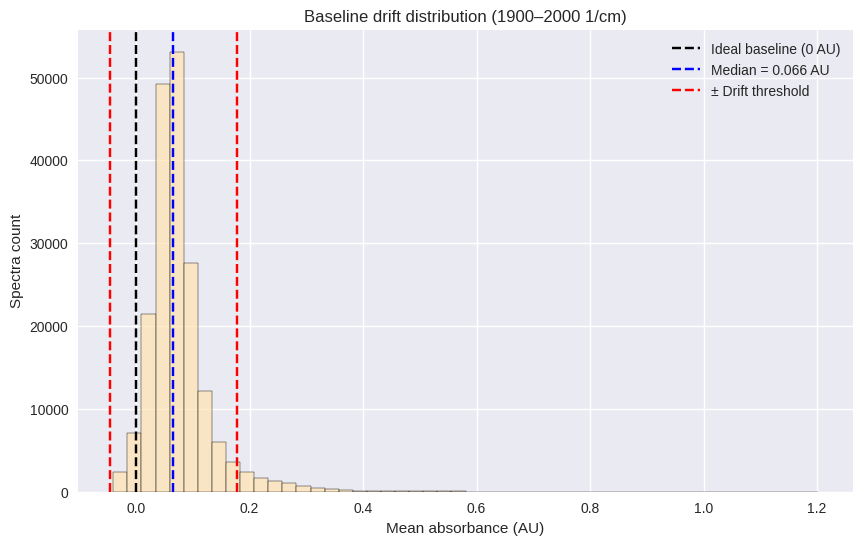

In [32]:
baseline_drift(df2.iloc[:,2:-2])

Number of spectra: 125887
Number of spectra that drift from the ideal baseline: 6295


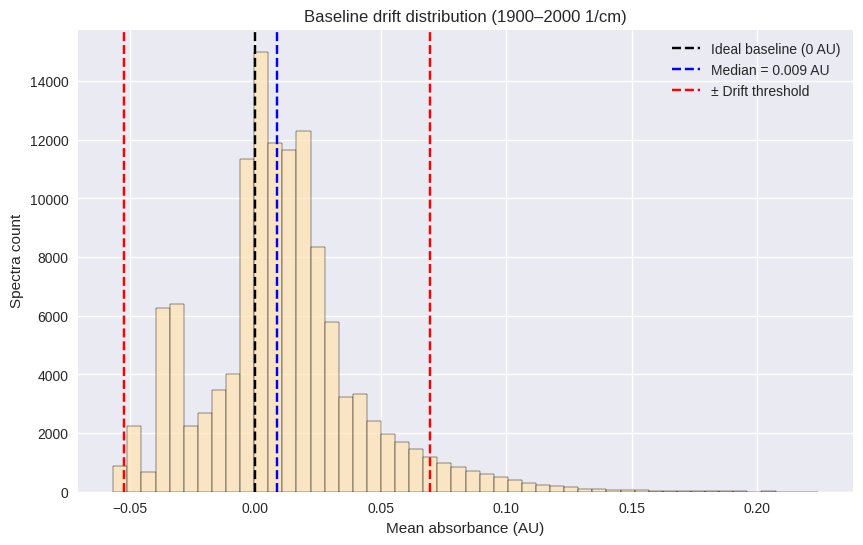

In [33]:
baseline_drift(bg_df.iloc[:,2:-2])

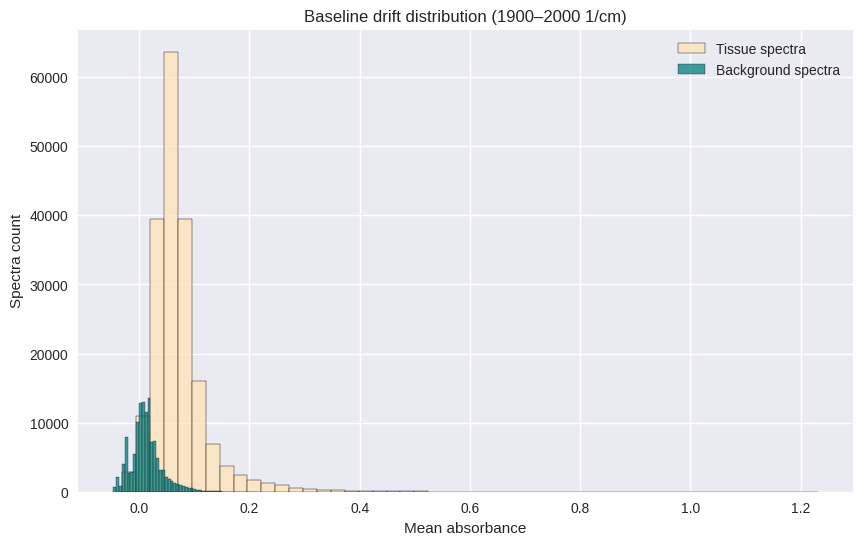

In [34]:
def baseline_drift_calc(data):
    wavenumbers = data.columns.values.astype(np.float64)
    flat_region = (wavenumbers > 1900) & (wavenumbers < 2000)
    
    # Compute mean absorbance per spectrum in this region
    baseline_mean = data.loc[:, flat_region].mean(axis=1)
    return baseline_mean

sg_drift = baseline_drift_calc(df2.iloc[:,2:-2])
bg_drift = baseline_drift_calc(bg_df.iloc[:,2:-2])

plt.figure(figsize = (10, 6))
bad_drift = 0.01
sns.histplot(sg_drift, bins=50, color="moccasin", label = "Tissue spectra")
sns.histplot(bg_drift, bins=50, color="teal", label = "Background spectra")
#plt.axvline(bad_drift, color="red", linestyle="--")
plt.title(r"Baseline drift distribution (1900–2000 1/cm)")
plt.xlabel("Mean absorbance")
plt.ylabel("Spectra count")
#plt.ylim(0, 200)
#plt.grid()
plt.legend()
plt.show()

## Figure for the manuscript

In [36]:
def snr_coloring(snr_list, compare_color1, compare_color2):
    color_snr = np.zeros((len(snr_list)), dtype = object)
    for i in range(len(snr_list)):
        snr_val = snr_list.iloc[i]
        if snr_val < 3:
            color_snr[i] = "black"
        elif (snr_val >= 3) & (snr_val < 100):
            color_snr[i] = compare_color1
        elif snr_val >= 100:
            color_snr[i] = compare_color2
    return color_snr

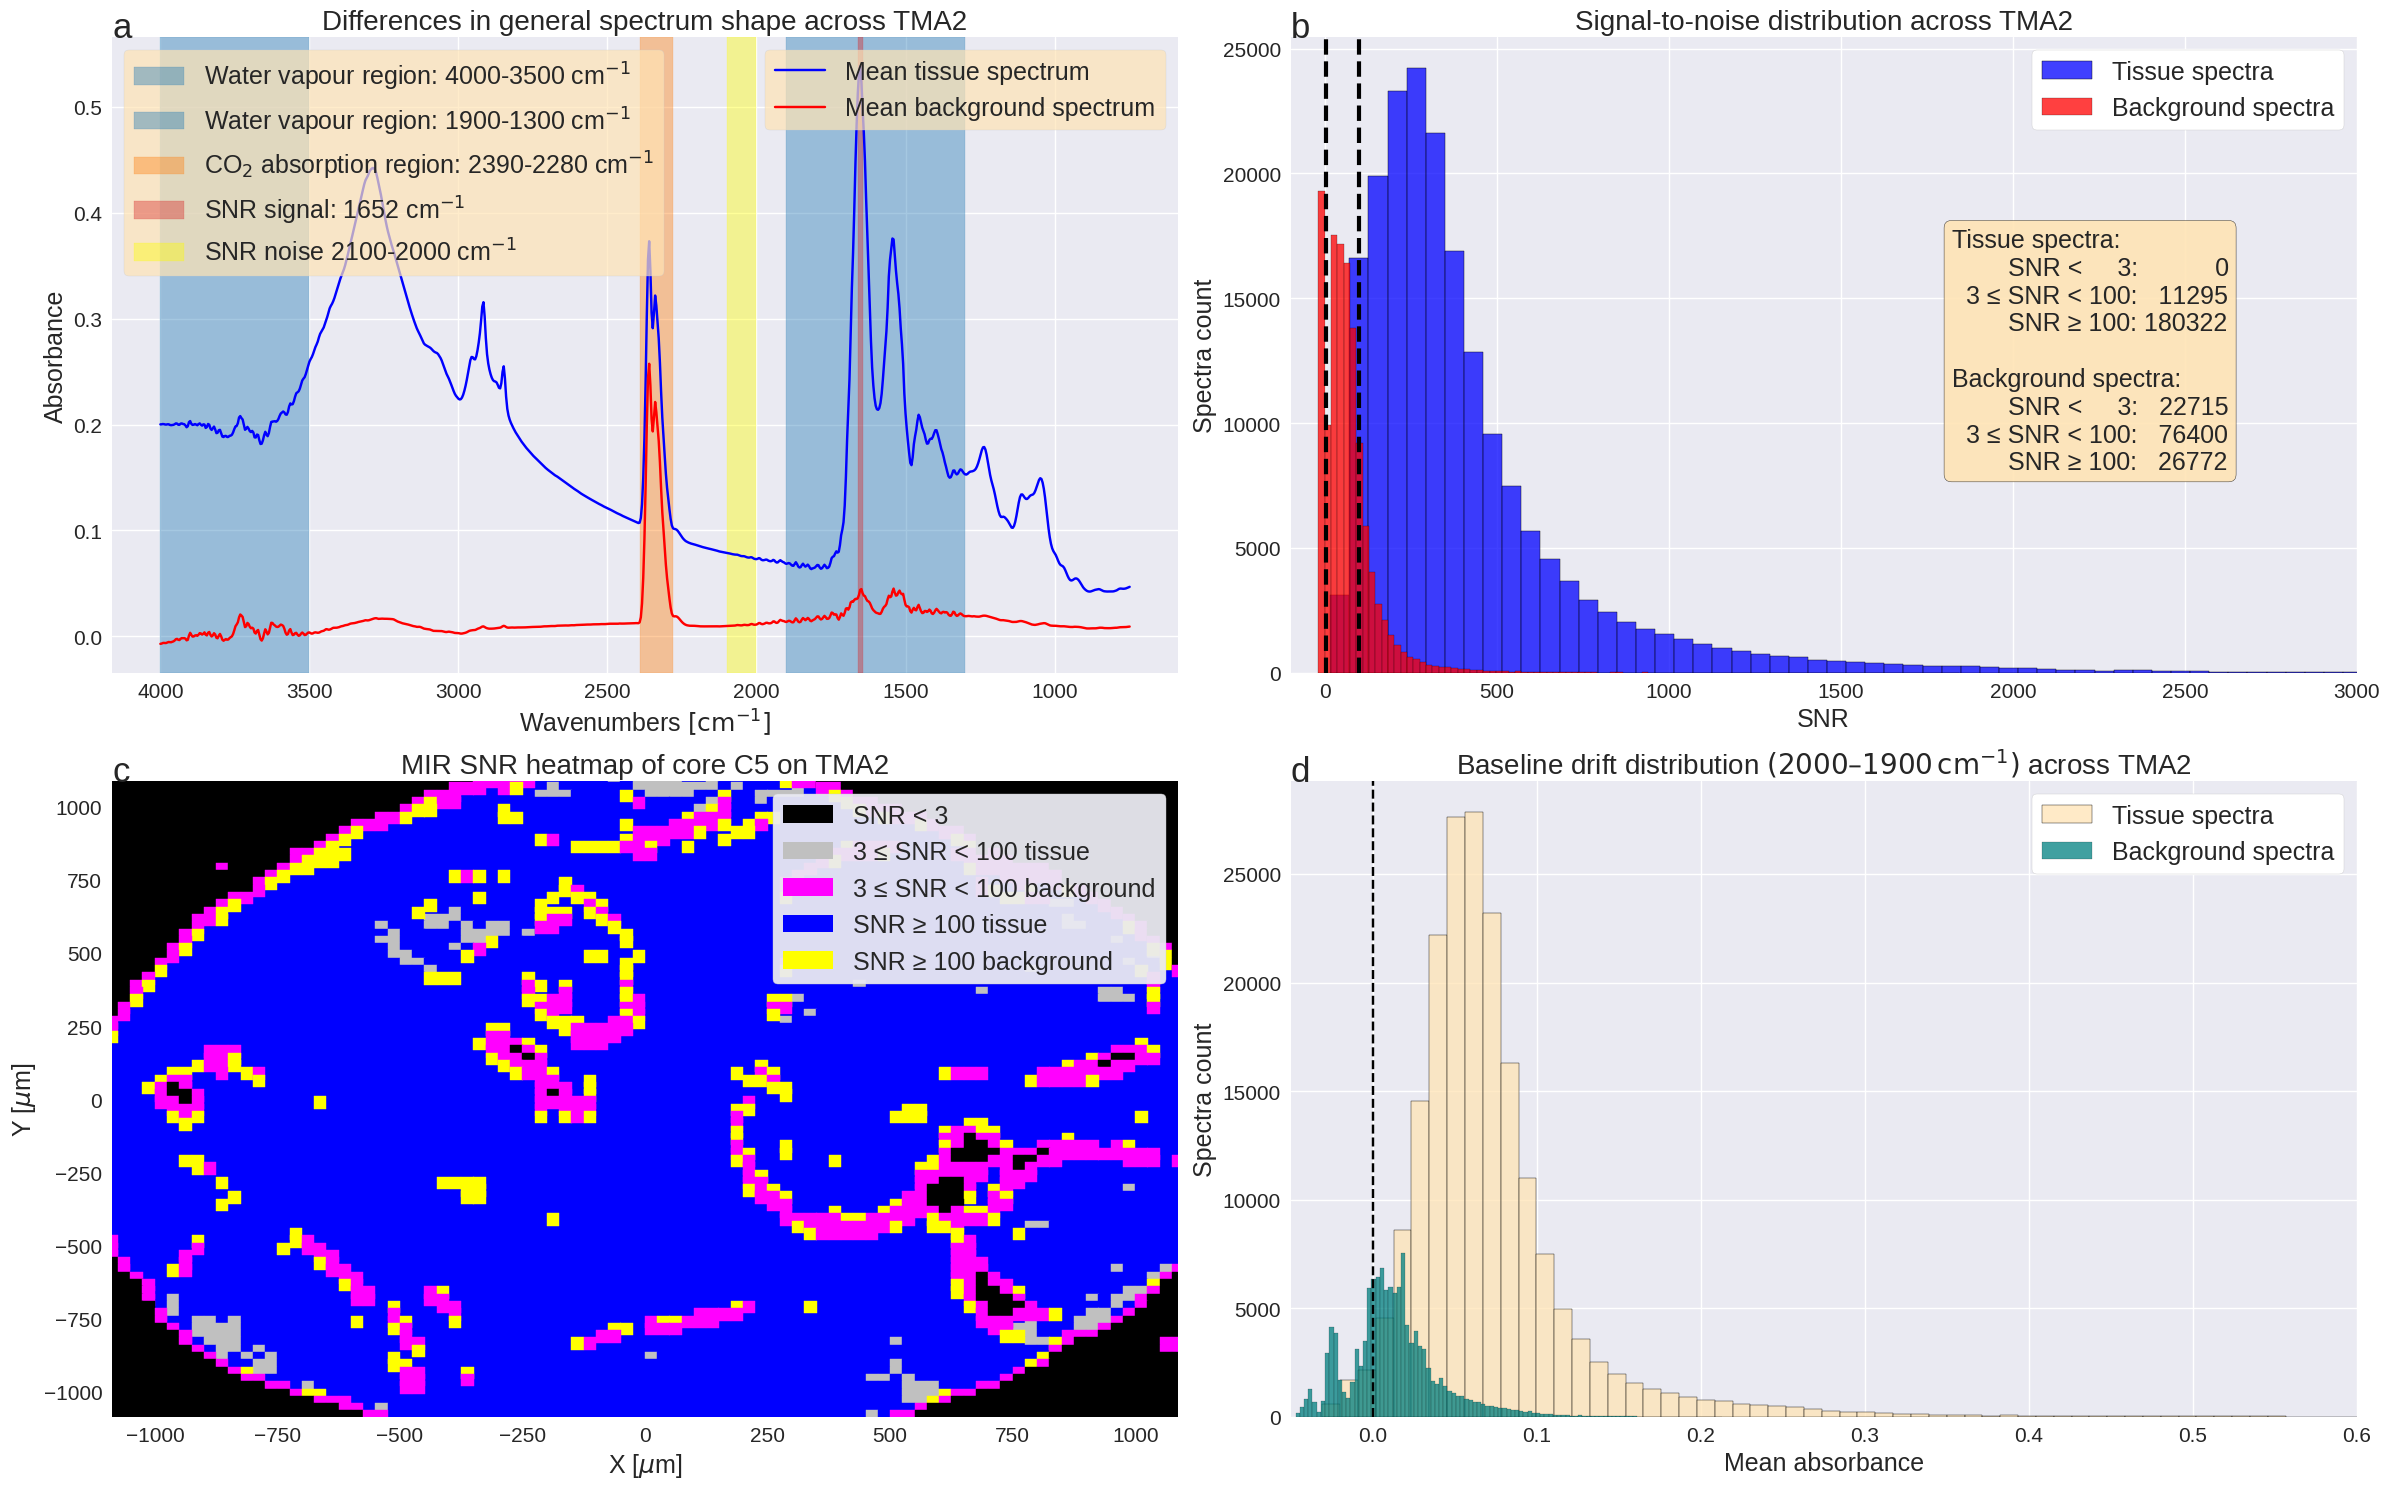

In [47]:
sp_cols = [col for col in df.columns if col not in ["X", "Y", "labels", "colon"]]
sp_values = np.array(sp_cols, dtype=float)
    
# Compute mean and std across all spectra
mean_tissue = df2[sp_cols].mean(axis=0)
mean_bg = bg_df[sp_cols].mean(axis=0)

bad_SNR = 3
great_SNR = 100

bad_drift = 0

plt.figure(figsize=(24, 15))


title_fs = 20
label_fs = 18
tick_fs = 15
legend_fs = 18


plt.subplot(2,2,1)
ax = plt.gca()

l1, = ax.plot(sp_values, mean_tissue.values, color="b",label="Mean tissue spectrum")
l2, = ax.plot(sp_values, mean_bg.values, color="r", label="Mean background spectrum")

s1 = ax.axvspan(4000, 3500, color="tab:blue", alpha=0.4, label=r"Water vapour region: 4000-3500 cm$^{-1}$")
s2 = ax.axvspan(1900, 1300, color="tab:blue", alpha=0.4, label=r"Water vapour region: 1900-1300 cm$^{-1}$")
s3 = ax.axvspan(2390, 2280, color="tab:orange", alpha=0.4, label=r"CO$_2$ absorption region: 2390-2280 cm$^{-1}$")

s4 = ax.axvspan(1660, 1642, color="tab:red", alpha=0.4, label=r"SNR signal: 1652 cm$^{-1}$")
s5 = ax.axvspan(2100, 2000, color="yellow", alpha=0.4, label=r"SNR noise 2100-2000 cm$^{-1}$")

plt.title("Differences in general spectrum shape across TMA2", fontsize=title_fs)
plt.xlabel(r"Wavenumbers $\left[\mathrm{cm}^{-1}\right]$", fontsize=label_fs)
plt.ylabel("Absorbance", fontsize=label_fs)
#plt.grid()
plt.xticks(fontsize=tick_fs)
plt.yticks(fontsize=tick_fs)
plt.gca().invert_xaxis()

legend_spectra = ax.legend(
    handles=[l1, l2],
    fontsize=legend_fs,
    facecolor="moccasin",
    frameon=True,
    framealpha=0.7,
    loc="upper right",
)

legend_regions = ax.legend(
    handles=[s1, s2, s3, s4, s5],
    fontsize=legend_fs,
    facecolor="moccasin",
    frameon=True,
    framealpha=0.7,
    loc="upper left",
)

ax.add_artist(legend_spectra)

plt.text(0.0001, 0.9999, "a", transform=plt.gca().transAxes, fontsize=25)


plt.subplot(2,2,2)
# Histogram overlays
sns.histplot(tma_snr, bins='rice', color="b", label="Tissue spectra")
sns.histplot(bg_snr, bins='rice', color="r", label="Background spectra")

# Vertical cutoff lines
plt.axvline(bad_SNR, color="black", linestyle="--", linewidth = 3)
plt.axvline(great_SNR, color="black", linestyle="--", linewidth = 3)

# Stats text
tissue_text = (
    "Tissue spectra:\n"
    f"        SNR <     {bad_SNR}:           {(tma_snr < bad_SNR).sum()}\n"
    f"  {bad_SNR} ≤ SNR < {great_SNR}:   {((tma_snr < great_SNR) & (tma_snr > bad_SNR)).sum()}\n"
    f"        SNR ≥ {great_SNR}: {(tma_snr >= great_SNR).sum()}"
)

background_text = (
    "Background spectra:\n"
    f"        SNR <     {bad_SNR}:   {(bg_snr < bad_SNR).sum()}\n"
    f"  {bad_SNR} ≤ SNR < {great_SNR}:   {((bg_snr < great_SNR) & (bg_snr > bad_SNR)).sum()}\n"
    f"        SNR ≥ {great_SNR}:   {(bg_snr >= great_SNR).sum()}"
)

# Place text box inside plot
plt.text(
    0.62, 0.70,
    tissue_text + "\n\n" + background_text,
    transform=plt.gca().transAxes,
    fontsize=legend_fs,
    va="top",
    bbox=dict(boxstyle="round", facecolor="moccasin", alpha=0.9)
)

plt.title("Signal-to-noise distribution across TMA2", fontsize=title_fs)
plt.xlabel("SNR", fontsize=label_fs)
plt.ylabel("Spectra count", fontsize=label_fs)
plt.xticks(fontsize=tick_fs)
plt.yticks(fontsize=tick_fs)
#plt.yscale("log")
plt.xlim(-100, 3000)
plt.legend(fontsize = legend_fs, facecolor="white", frameon=True, framealpha=1)
#plt.grid()

plt.text(0.0001, 0.9999, "b", transform=plt.gca().transAxes, fontsize=25)

plt.subplot(2,2,3)
N = "C5"
tissue_c1 = "silver"
tissue_c2 = "blue"

bg_c1 = "magenta"
bg_c2 = "yellow"

cucc = df2[df2["labels"] == N]
bg_cucc = bg_df[bg_df["labels"] == N]

cucc_snr = SNR(cucc.iloc[:,2:-2])
cuccbg_snr = SNR(bg_cucc.iloc[:,2:-2])

plt.scatter(cucc["X"], cucc["Y"], c = snr_coloring(cucc_snr, tissue_c1, tissue_c2), marker = "s", s = 80)
#cbar = plt.colorbar(orientation="vertical")
#cbar.set_label("Signal SNR", size=15)

plt.scatter(bg_cucc["X"], bg_cucc["Y"], c = snr_coloring(cuccbg_snr, bg_c1, bg_c2), marker = "s", s = 80)
#cbar = plt.colorbar(orientation="horizontal")
#cbar.set_label(label = "Background SNR", size = 15)

legend_elements = [
    Patch(facecolor='black', label='SNR < 3'),
    Patch(facecolor=tissue_c1, label='3 ≤ SNR < 100 tissue'),
    Patch(facecolor=bg_c1, label='3 ≤ SNR < 100 background'),
    Patch(facecolor=tissue_c2, label='SNR ≥ 100 tissue'),
    Patch(facecolor=bg_c2, label='SNR ≥ 100 background')
]

plt.legend(
    handles=legend_elements,
    fontsize=legend_fs,
    loc="upper right",
    frameon=True,
    framealpha=0.95
)

plt.xlabel(r"X [$\mu$m]", fontsize=label_fs)
plt.ylabel(r"Y [$\mu$m]", fontsize=label_fs)
plt.xticks(fontsize=tick_fs)
plt.yticks(fontsize=tick_fs)
plt.title(f"MIR SNR heatmap of core {N} on TMA2", fontsize=title_fs)
plt.xlim(bg_cucc["X"].min(axis = 0) - 0.05, bg_cucc["X"].max(axis = 0) + 0.05)
plt.ylim(bg_cucc["Y"].min(axis = 0) - 0.05, bg_cucc["Y"].max(axis = 0) + 0.05)
plt.grid()

plt.text(0.0001, 0.9999, "c", transform=plt.gca().transAxes, fontsize=25)

plt.subplot(2,2,4)
sns.histplot(sg_drift, bins='rice', color="moccasin", label = "Tissue spectra")
sns.histplot(bg_drift, bins='rice', color="teal", label = "Background spectra")
plt.axvline(bad_drift, color="black", linestyle="--")
plt.title(r"Baseline drift distribution $\left(2000–1900\,\mathrm{cm}^{-1}\right)$ across TMA2", fontsize=title_fs)
plt.xlabel("Mean absorbance", fontsize=label_fs)
plt.ylabel("Spectra count", fontsize=label_fs)
plt.xticks(fontsize=tick_fs)
plt.yticks(fontsize=tick_fs)
#plt.yscale("log")
plt.xlim(-0.05, 0.6)
#plt.grid()
plt.legend(fontsize = legend_fs, facecolor="white", frameon=True, framealpha=1)

plt.text(0.0001, 0.9999, "d", transform=plt.gca().transAxes, fontsize=25)

plt.tight_layout()
#plt.savefig("mir_technval.pdf")
plt.show()

## Normalization check

In [84]:
def norm_check(data):
    # Compute L2 norm per spectrum
    vector_norms = np.linalg.norm(data.values, axis=1)
    med_norm = np.median(vector_norms)
    lower_norm = np.percentile(vector_norms, 2.5)
    upper_norm = np.percentile(vector_norms, 97.5)
    
    print(lower_norm, med_norm, upper_norm)
    
    plt.figure(figsize = (10, 6))
    sns.histplot(vector_norms, bins=50, color="moccasin")
    plt.axvline(med_norm, color="black", linestyle="--", label="Median")
    plt.axvline(lower_norm, color="red", linestyle="--", label="2.5 %")
    plt.axvline(upper_norm, color="red", linestyle="--", label="97.5 %")
    plt.title("Vector norm of absorbance spectra")
    plt.xlabel("L2 Norm")
    plt.ylabel("Spectra count")
    plt.legend()
    #plt.grid()
    plt.show()

2.8099083650706276 5.898385155514885 10.79405632669266


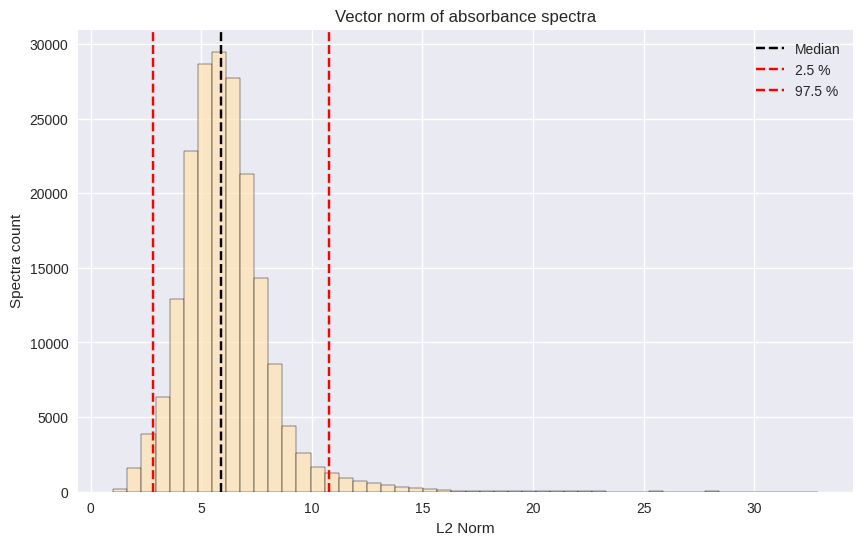

In [85]:
norm_check(df2.iloc[:,2:-2])

## Normalization

In [86]:
def SNV(df):
    df = df.sub(df.mean(axis = 1), axis = 0).divide(df.std(axis = 1), axis = 0)
    return df

df2.iloc[:, 2:-2] = SNV(df2.iloc[:, 2:-2])
df2

,X,Y,4000.0,3996.0,3992.0,3988.0,3984.0,3980.0,3976.0,3972.0,...,776.0,772.0,768.0,764.0,760.0,756.0,752.0,748.0,labels,colon
40,-87.499997,1087.499957,0.525056,0.519718,0.506891,0.500840,0.510607,0.525745,0.526439,0.520442,...,-1.779450,-1.778853,-1.777652,-1.771901,-1.766029,-1.764512,-1.760345,-1.756483,B1,NC
41,-62.499998,1087.499957,0.555541,0.556506,0.554542,0.559109,0.555621,0.544017,0.532993,0.527580,...,-1.655851,-1.653400,-1.646529,-1.641654,-1.635451,-1.633170,-1.634695,-1.631565,B1,NC
42,-37.499999,1087.499957,0.403854,0.410669,0.411247,0.409029,0.408204,0.404232,0.401111,0.404852,...,-1.564673,-1.566765,-1.566036,-1.562398,-1.563104,-1.563928,-1.561876,-1.562580,B1,NC
43,-12.500000,1087.499957,0.638904,0.641415,0.654239,0.660435,0.645660,0.630742,0.637165,0.646517,...,-1.793744,-1.794994,-1.796338,-1.789135,-1.777917,-1.775048,-1.778925,-1.781039,B1,NC
44,12.500000,1087.499957,0.656928,0.646440,0.665469,0.675057,0.674162,0.678693,0.670455,0.644737,...,-1.769957,-1.769093,-1.765394,-1.759182,-1.748240,-1.733803,-1.720340,-1.719706,B1,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317467,187.499993,-1087.499957,0.592479,0.587858,0.584399,0.575233,0.575828,0.575739,0.572626,0.573132,...,-1.406834,-1.412177,-1.415613,-1.415425,-1.415981,-1.416135,-1.414615,-1.418298,I5,CRC
317468,212.499992,-1087.499957,0.723066,0.738130,0.747701,0.733405,0.708660,0.702156,0.723078,0.745488,...,-1.492956,-1.494172,-1.500243,-1.507936,-1.510055,-1.510430,-1.509706,-1.510901,I5,CRC
317469,237.499991,-1087.499957,0.603165,0.599910,0.597613,0.594872,0.591450,0.591813,0.595639,0.593528,...,-1.506307,-1.507703,-1.512824,-1.519518,-1.524596,-1.526170,-1.524431,-1.525260,I5,CRC
317470,262.499990,-1087.499957,0.688928,0.683374,0.673697,0.657033,0.652460,0.661826,0.670723,0.669619,...,-1.579046,-1.581444,-1.583043,-1.586327,-1.587520,-1.588008,-1.590679,-1.591542,I5,CRC


In [87]:
print(df2.iloc[:, 2:-2].mean(axis = 1).mean(),' +/- ',df2.iloc[:, 2:-2].mean(axis = 1).std()) #checking if every spectrum has mean of 0
print(df2.iloc[:, 2:-2].std(axis = 1).mean(),' +/- ',df2.iloc[:, 2:-2].std(axis = 1).std()) #checking if every spectrum has std of 1

9.030824929798804e-18  +/-  1.5943469617282315e-15
1.0  +/-  5.326950320488378e-16


In [88]:
df2.isna().sum().sum()

0

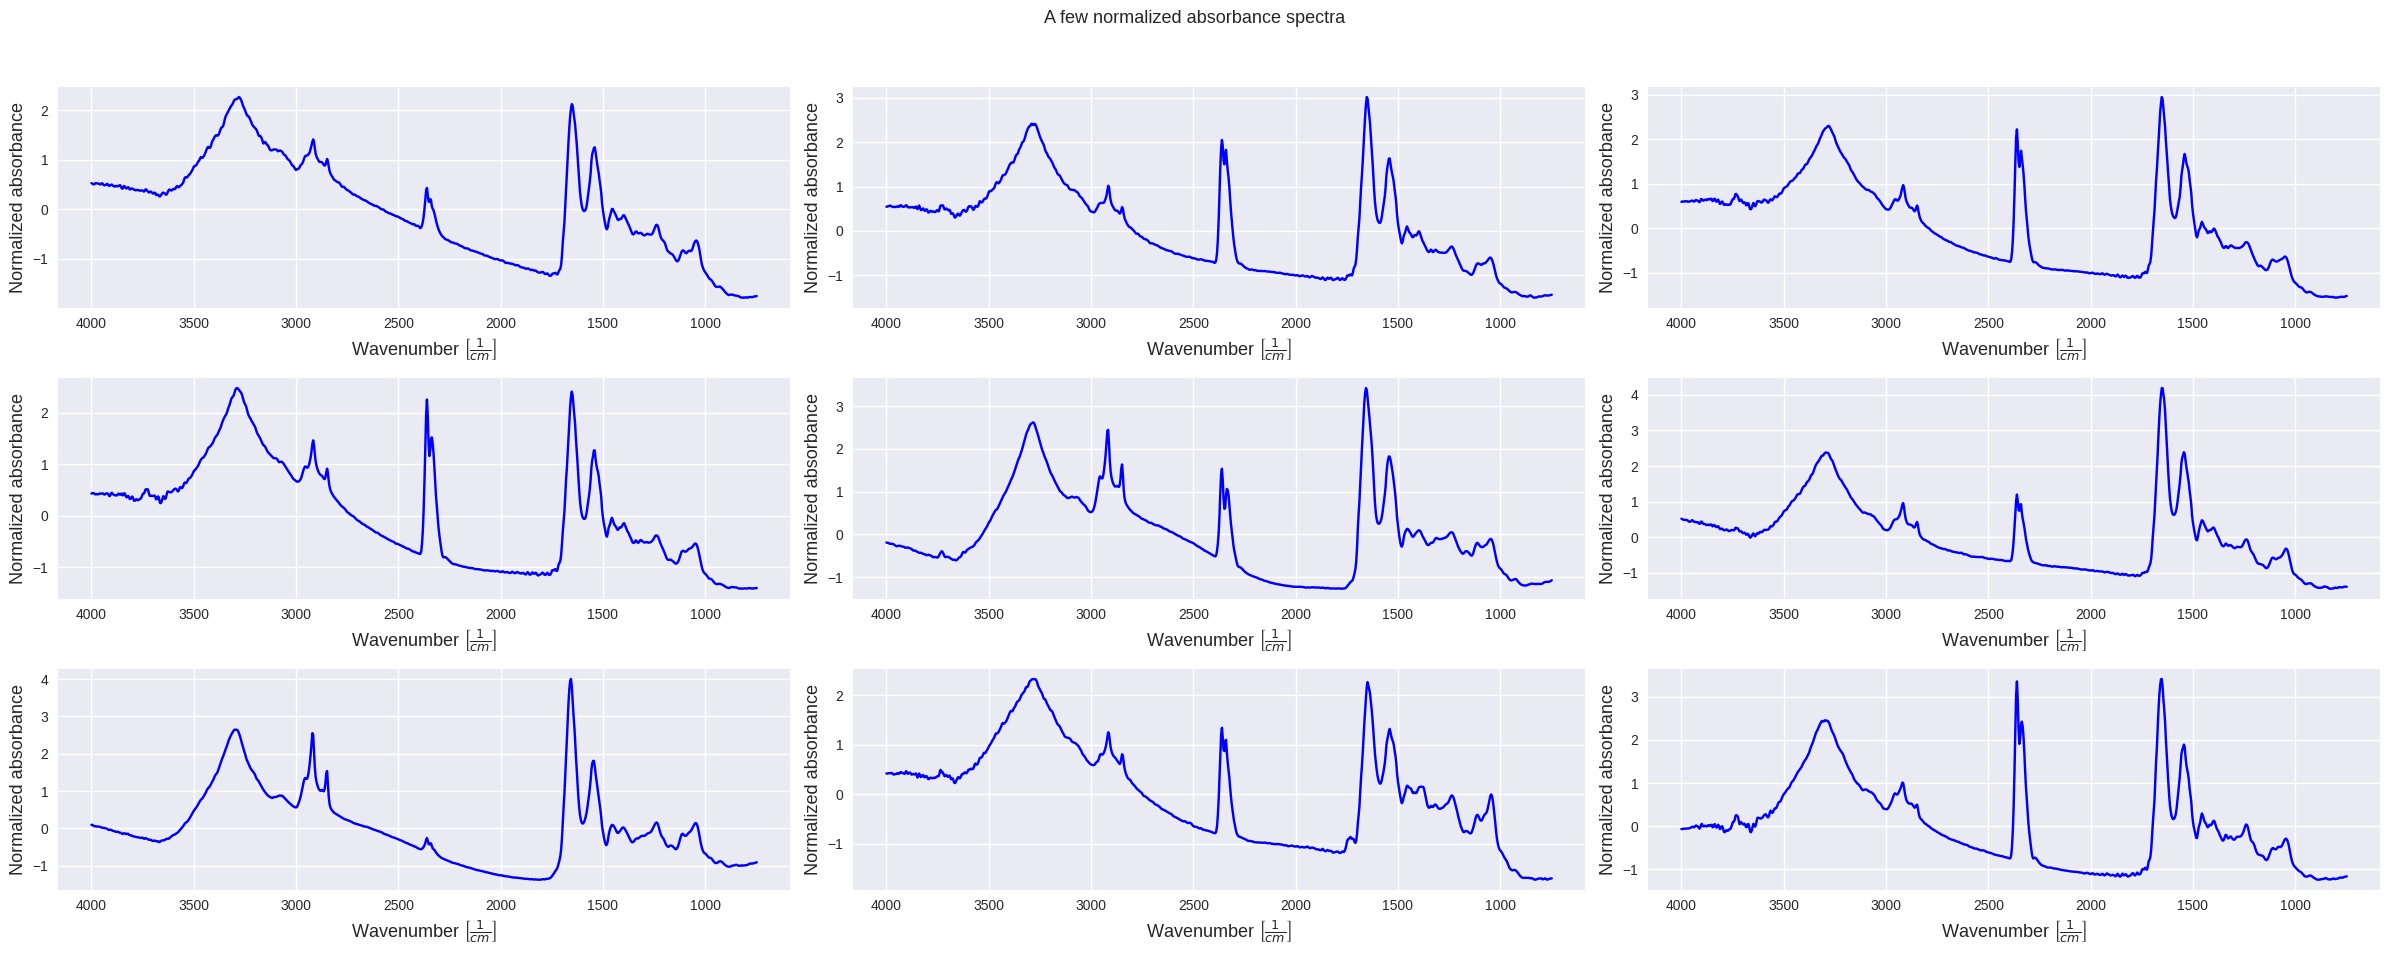

In [89]:
plt.figure(figsize = (24, 10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.plot(df2.columns.values[2:-2].astype(np.float64), df2.iloc[i * 10000,2:-2], color = "b")
    plt.xlabel(r"Wavenumber $\left[\frac{1}{cm}\right]$", fontsize = 13)
    plt.ylabel("Normalized absorbance", fontsize = 13)
    plt.gca().invert_xaxis()
    
plt.suptitle("A few normalized absorbance spectra", fontsize = 13)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()